In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml212cw2_my_helpers import *
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from iaml_cw2_helpers import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import  accuracy_score
Xtrn_org , Ytrn_org , Xtst_org , Ytst_org = load_Q2_dataset ()
Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np.mean(Xtrn, axis =0)
Xtrn_m = Xtrn - Xmean ; Xtst_m = Xtst - Xmean # Mean−normalised version

0.0
1.0
0.0
1.0
0.17737719254368406
0.3349824841708448
0.17563382275987316
0.3334625647782058


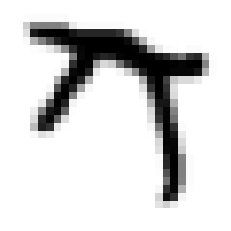

10


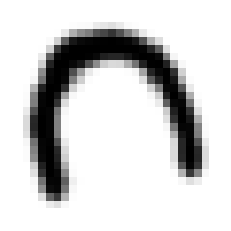

2


In [2]:
# Q2.1
def iaml212cw2_q2_1():
    print(Xtrn.min())
    print(Xtrn.max())
    print(Xtst.min())
    print(Xtst.max())
    print(Xtrn.mean())
    print(Xtrn.std())
    print(Xtst.mean())
    print(Xtst.std())
    sample_letter = Xtrn[0]
    sample_letter_resize = sample_letter.reshape(28, 28)
    plt.imshow(sample_letter_resize, cmap = 'binary')
    plt.axis("off")
    plt.show()
    print(Ytrn[0])
    sample_letter = Xtrn[1]
    sample_letter_resize = sample_letter.reshape(28, 28)
    plt.imshow(sample_letter_resize, cmap = 'binary')
    plt.axis("off")
    plt.show()
    print(Ytrn[1])
iaml212cw2_q2_1()   # comment this out when you run the function

# Q2.2
def iaml212cw2_q2_2():
#
# iaml212cw2_q2_2()   # comment this out when you run the function

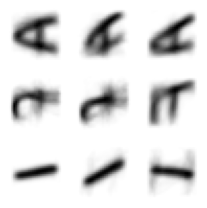

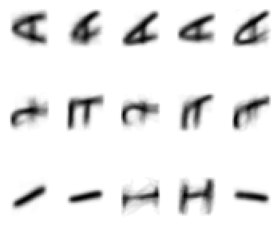

In [3]:
# Q2.3
def iaml212cw2_q2_3():
    label_0_loc = np.where(Ytrn == 0)[0]
    label_5_loc = np.where(Ytrn == 5)[0]
    label_8_loc = np.where(Ytrn == 8)[0]
    X0 = []
    X5 = []
    X8 = []
    for i in range(7800):
        if i in label_0_loc:
            X0.append(Xtrn[i])
        elif i in label_5_loc:
            X5.append(Xtrn[i])
        elif i in label_8_loc:
            X8.append(Xtrn[i])
    letters_k3 = []
    for i in [X0, X5, X8]:
        km = KMeans(n_clusters=3, random_state=0)
        km.fit(i)
        for j in range(3):
            letters_k3.append(km.cluster_centers_[j])
    letters_k5 = []
    for i in [X0, X5, X8]:
        km = KMeans(n_clusters=5, random_state=0)
        km.fit(i)
        for j in range(5):
            letters_k5.append(km.cluster_centers_[j])
    f, ax = plt.subplots(3, 3, figsize=(3,3))
    for i in range(9):
        letter = letters_k3[i]
        x = i % 3
        y = i // 3
        sample_letter_resize = letter.reshape(28, 28)
        ax[y,x].imshow(sample_letter_resize, cmap = 'binary')
        ax[y,x].axis("off")
    f.tight_layout()
    f, ax = plt.subplots(3, 5, figsize=(4,4))
    for i in range(15):
        letter = letters_k5[i]
        x = i % 5
        y = i // 5
        sample_letter_resize = letter.reshape(28, 28)
        ax[y,x].imshow(sample_letter_resize, cmap = 'binary')
        ax[y,x].axis("off")
    f.tight_layout()
iaml212cw2_q2_3()   # comment this out when you run the function

2.3 (b)
I find that the centres of clusters mainly differ in the tilting direction (either slightly left tilted, not tilted or slightly right tilted). There is also some slight difference in the way 'I' is written. I have concerns on future classification tasks with this dataset since they all face one way (90 degrees left rotated) while in reality there could be handwritings that face any direction. Therefore this dataset is not ready for classification that is not exactly rotated left 90 degrees.


# Q2.4
def iaml212cw2_q2_4():
#
# iaml212cw2_q2_4()   # comment this out when you run the function


In [4]:
# Q2.5
def iaml212cw2_q2_5():
    logisticRegr = LogisticRegression(max_iter=1000, random_state=0)
    logisticRegr.fit(Xtrn_m, Ytrn)
    score = logisticRegr.score(Xtrn_m, Ytrn)
    print(score)
    score2 = logisticRegr.score(Xtst_m, Ytst)
    print(score2)
    pred = logisticRegr.predict(Xtst_m)
    scores = []
    for i in range(26):
        label = np.where(Ytst == i)[0]
        score = 0
        for j in range(2600):
            if j in label:
                if pred[j]==Ytst[j]:
                    score+=1
        scores.append(score)
    lst = []
    big_letters = list(map(chr, range(ord('A'), ord('Z')+1)))
    z_scores = list(zip(scores,range(26)))
    sorted_z_scores = sorted(z_scores)
    for i in range(5):
        lst.append(sorted_z_scores[i][1])
        lst.append(big_letters[sorted_z_scores[i][1]])
        lst.append(100-round(sorted_z_scores[i][0]))
    for i in range(5):
        lst2=[]
        for item in lst:
            if lst.index(item)<(i+1)*3:
                lst2.append(item)
        print(lst2[-3:])
        lst2.clear()
        label_8_loc = np.where(Ytst == 8)[0]
        label_11_loc = np.where(Ytst == 11)[0]
    label_17_loc = np.where(Ytst == 17)[0]
    label_10_loc = np.where(Ytst == 10)[0]
    label_13_loc = np.where(Ytst == 13)[0]
    X11 = []
    X17 = []
    X8 = []
    X10 = []
    X13 = []
    for i in range(2600):
        if i in label_11_loc:
            X11.append(Xtst_m[i])
        elif i in label_17_loc:
            X17.append(Xtst_m[i])
        elif i in label_8_loc:
            X8.append(Xtst_m[i])
        elif i in label_10_loc:
            X10.append(Xtst_m[i])
        elif i in label_13_loc:
            X13.append(Xtst_m[i])

    from collections import Counter
    for i, j in enumerate([X11, X17, X8, X10, X13]):
        a = logisticRegr.predict(j)
        c = Counter(a)
        c.most_common(1)
        print ("",c.most_common(2))
iaml212cw2_q2_5()   # comment this out when you run the function

0.9161538461538462
0.7223076923076923
[11, 'L', 53]
[17, 'R', 48]
[8, 'I', 42]
[10, 'K', 38]
[13, 'N', 36]
 [(11, 47), (8, 35)]
 [(17, 52), (10, 14)]
 [(8, 58), (11, 24)]
 [(10, 62), (17, 7)]
 [(13, 64), (7, 8)]


2.6 (a) 
1. Model parameter tuning. This includes 'penalty', 'C', 'solver', 'max_iter' and etc. We are given a lot of choices by controlling the parameters and we can choose a best one out of them.
2. Cross validation. For example we can use K-fold cross validation and it can effectively protect the model against overfitting because we only have a limited amount of data.
3. Dimentionality reduction. We reduce certain number of input variables in the training data. Logistic regression is not excellent at dealing with large number of input variables and lot of the input variables might indeed be non-correlated with the label. PCA is worth applying before we fit the data into the logistic model. 

Here we will use a combination of the first method (model parameter tuning) and the second method (cross validation).

In [33]:
# Q2.6 
def iaml212cw2_q2_6():
    scores_trn = []
    for i in np.logspace(-2, 2,5):
        logModel = LogisticRegression(C=i,max_iter=3000,random_state=0)
        logModel.fit(Xtrn_m, Ytrn)
        score_trn = cross_val_score(logModel, Xtrn_m, Ytrn, cv=3)
        scores_trn.append(np.mean(score_trn))
    print(scores_trn)
    scores_tst = []
    for i in np.logspace(-2, 2,10):
        logModel = LogisticRegression(C=i,max_iter=3000,random_state=0)
        logModel.fit(Xtrn_m, Ytrn)
        score_tst= cross_val_score(logModel, Xtst_m, Ytst, cv=3)
        scores_tst.append(np.mean(score_tst))
    print(scores_tst)
iaml212cw2_q2_6()   # comment this out when you run the function

[0.7169230769230769, 0.7428205128205129, 0.716025641025641, 0.6762820512820514, 0.6607692307692309]
[0.6546145424614621, 0.6826908819045437, 0.6911544946738375, 0.6834664762975334, 0.6711577444454212, 0.6626954635497273, 0.6546185380822619, 0.6469269680430249, 0.6434636527255018, 0.6407719361801688]


-0.09747401775408393 0.18378613679585562 0.001708791632836062
0.0 0.18378613679585562 0.07231314807821394


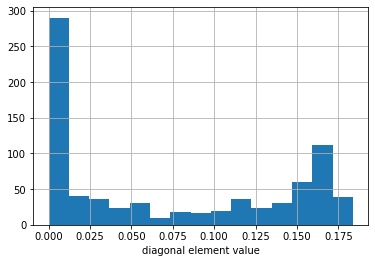

In [19]:
# Q2.7 
def iaml212cw2_q2_7():
    label_0_loc = np.where(Ytrn == 0)[0]
    data = []
    for i in range(7800):
        if i in label_0_loc:
            data.append(Xtrn_m[i])
    data = np.matrix(data).T
    sample_mean_vector = data.mean(1)
    sample_cov_matrix = np.cov(data)
    min_e = sample_cov_matrix.min()
    max_e = sample_cov_matrix.max()
    mean_e = sample_cov_matrix.mean()
    print(min_e, max_e, mean_e)
    diag_ = np.diagonal(sample_cov_matrix)
    min_diag = diag_.min()
    max_diag = diag_.max()
    mean_diag = diag_.mean()
    print(min_diag, max_diag, mean_diag)
    plt.hist(diag_, bins=15)
    plt.xlabel("diagonal element value")
    plt.grid()
    plt.show()
iaml212cw2_q2_7()   # comment this out when you run the function

# 2.7 (d) this is the error so markdown instead of code cell
from scipy import stats
gd = stats.multivariate_normal(np.squeeze(np.asarray(sample_mean_vector)), sample_cov_matrix)

In [32]:
# Q2.8 
def iaml212cw2_q2_8():
    label_0_loc = np.where(Ytrn == 0)[0]
    data = []
    for i in range(7800):
        if i in label_0_loc:
            data.append(Xtrn_m[i])
    gmm = GaussianMixture(n_components=1, covariance_type='full')
    gmm.fit(data)
    label_0_loc = np.where(Ytst == 0)[0]
    data = []
    for i in range(2600):
        if i in label_0_loc:
            data.append(Xtst_m[i])
    print(gmm.score(data[0].reshape(1,-1)))
    gmms = []
    for i in range(26):
        gmm = GaussianMixture(n_components=2, covariance_type='full')
        label_loc = np.where(Ytst == i)[0]
        data = []
        for j in range(7800):
            if j in label_loc:
                data.append(Xtrn_m[j])
        gmm.fit(data)
        gmms.append(gmm)
    trn_accs = []
    tst_accs = []
    for i in range(26):
        label_loc = np.where(Ytrn == i)[0]
        data = []
        for j in range(7800):
            if j in label_loc:
                data.append(Xtrn_m[j])
        trn_accs.append(gmms[i].predict(data))

        label_loc = np.where(Ytst == i)[0]
        data = []
        for j in range(2600):
            if j in label_loc:
                data.append(Xtst_m[j])
        tst_accs.append(gmms[i].predict(data))
    acc = []
    for i in range(26):
        acc.append(accuracy_score(trn_accs[i], [1]*300))
    print(np.mean(acc))
    acc = []
    for i in range(26):
        acc.append(accuracy_score(tst_accs[i], [1]*100))
    print(np.mean(acc))
iaml212cw2_q2_8()   # comment this out when you run the function

-838252.1823930496
0.5147435897435897
0.5226923076923077
